In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lab 7: The Impact of Minimum Wage on Employment

## Overview

We are going to replicate a study conducted by **[Card and Krueger in 1994](https://davidcard.berkeley.edu/papers/njmin-aer.pdf)** that investigates the relationship between a rise in the minimum wage and employment.

## Background

[Economic theories](https://www.frbsf.org/research-and-insights/publications/economic-letter/2015/12/effects-of-minimum-wage-on-employment/) have long suggested that increases in the minimum wage lead to a reduction in employment for at least two reasons:

1. **Businesses are less likely to hire** and will rather invest in other resources that are now cheaper because of the wage increase.
2. **Higher salaries will induce businesses to raise their prices** to compensate for their greater costs; as prices increase, we expect fewer buyers, which will lead to lower demand and employment.

These theories have found [mixed support](https://www.nber.org/papers/w12663), but the discussion is still very much open within the policy world, as states discuss the opportunity to raise their minimum wage to help local populations to face increasing living costs. Discussions are currently occurring in **[New Jersey](https://www.nytimes.com/2019/01/17/nyregion/nj-minimum-wage.html)** and **[Illinois](https://kmox.radio.com/articles/discussions-underway-raise-illinois-minimum-wage-15hour)** to raise the minimum wage to **$15/hour** ([New York](https://www.nytimes.com/2018/12/31/nyregion/15-minimum-wage-new-york.html?module=inline) has successfully passed this same raise in 2018).

## The Original Study

One of the first studies looking at this policy problem was **Card and Krueger‚Äôs**. They applied a difference-in-difference design to look at two groups of fast-food restaurants:

- Fast-food restaurants in **New Jersey** where the minimum wage increased from \\$4.25 to $5.05 per hour (treatment group)
- Fast-food restaurants in **Pennsylvania** where the minimum wage did not increase (control group).

They collected data before and after the minimum wage was approved. Data used in the study can be downloaded [here](https://github.com/DS4PS/PROG-EVAL-III/blob/master/TEXTBOOK/DATA/DID_Example.csv).

## Research Question

- **Do increases in the minimum wage affect employment?**

## Hypothesis

- **An increase in the minimum wage is negatively correlated with employment.**


## Part 1: Diff-in-Diff Conceptual

<!-- BEGIN QUESTION -->

**Question 1.1:** How does the choice of research design, specifically a difference-in-differences approach, influence the validity and reliability of conclusions drawn from empirical studies examining the impact of policy changes, such as minimum wage increases, on economic outcomes like employment? Hint: Think about the parallell trend assumption.

We're able to obtain valit and relaible data from this kind of difference-in-difference approach because there is temporal data, which gives us insight on both Pennsylvania and New Jersey over time. Because both of these major cities are relatively close to each other and similar, this allows us to really focus on the experimental variable (wages) on unemployment without having to deal with a lot of different noice factors. The parallel trend assumption tells us that if these two groups are to stay the same over time, their employment trends are going to be parallel. However, if something were to happen to one group (getting a treatment), this groups trend would change trajectory, showing that there is a significant difference of that treatement if the trends don't return to parallel. 

<!-- END QUESTION -->

## Part 2: Working with the Data

We now proceed with loading in the data used in the original 1994 study. It cointains the following variables:

| Variable Name | Description                                          |
|---------------|------------------------------------------------------|
| ID            | Unique identifier for fast food                     |
| Treatment     | Pre-treatment (=0) and post-treatment (=1)          |
| Group         | 1 if NJ (treatment); 0 if PA (Control)              |
| Empl          | # of full time employees                             |
| C.Owned       | If owned by a company (=1) or not (=0)               |
| Hours.Opening | Number hours open per day                            |
| Soda          | Price of medium soda, including tax                  |
| Fries         | Price of small fries, including tax                  |
| Chain         | 1 = BK, 2 = KFC, 3 = Roys, 4 = Wendys                |
| SouthJ        | South New Jersey                                     |
| CentralJ      | Central New Jersey                                   |
| NorthJ        | North New Jersey                                     |
| PA1           | Northeast suburbs of Philadelphia                    |
| PA2           | Easton and other PA areas                            |
| Shore         | New Jersey Shore                                     |


In [24]:
dd_df = pd.read_csv('data/DID_Example.csv')
dd_df

ID  Chain  SouthJ  CentralJ  NorthJ  PA1  PA2  Shore  Group  Empl  \
0     46      1       0         0       0    1    0      0      0  30.0   
1     49      2       0         0       0    1    0      0      0   6.5   
2    506      2       0         0       0    1    0      0      0   3.0   
3     56      4       0         0       0    1    0      0      0  20.0   
4     61      4       0         0       0    1    0      0      0   6.0   
..   ...    ...     ...       ...     ...  ...  ...    ...    ...   ...   
815  423      2       0         0       1    0    0      0      1  19.0   
816  424      2       0         0       1    0    0      0      1  12.0   
817  426      3       0         0       1    0    0      0      1   5.0   
818  427      4       0         0       1    0    0      0      1   0.0   
819  428      4       0         0       1    0    0      0      1  10.0   

     C.Owned  Hours.Opening  Soda  Fries  Treatment  
0          0           16.5  1.03   1.03          0  
1          0           13.0  1.01   0.90          0  
2          1           10.0  0.95   0.74          0  
3          1           12.0  0.87   0.82          0  
4          1           12.0  0.87   0.77          0  
..       ...            ...   ...    ...        ...  
815        1            4.0  1.05   0.84          1  
816        1           10.0  1.05   0.94          1  
817        1           19.0  1.11   1.05          1  
818        0            7.0  1.11   1.09          1  
819        0            7.0  1.05   0.89          1  

[820 rows x 15 columns]

**Question 2.1:** Summarize the data above using the `.describe()` Pandas function.

In [25]:
dd_df_summarized = dd_df.describe()


dd_df_summarized

ID       Chain      SouthJ    CentralJ      NorthJ         PA1  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean   246.507317    2.117073    0.226829    0.153659    0.426829    0.087805   
std    148.141276    1.109819    0.419037    0.360841    0.494919    0.283184   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    119.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
50%    237.500000    2.000000    0.000000    0.000000    0.000000    0.000000   
75%    372.000000    3.000000    0.000000    0.000000    1.000000    0.000000   
max    522.000000    4.000000    1.000000    1.000000    1.000000    1.000000   

              PA2       Shore       Group        Empl     C.Owned  \
count  820.000000  820.000000  820.000000  802.000000  820.000000   
mean     0.104878    0.085366    0.807317    8.238778    0.343902   
std      0.306583    0.279596    0.394647    8.298807    0.475299   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    2.000000    0.000000   
50%      0.000000    0.000000    1.000000    6.000000    0.000000   
75%      0.000000    0.000000    1.000000   12.000000    1.000000   
max      1.000000    1.000000    1.000000   60.000000    1.000000   

       Hours.Opening        Soda       Fries   Treatment  
count     820.000000  790.000000  775.000000  820.000000  
mean       12.650000    1.044911    0.931471    0.500000  
std         4.763907    0.091059    0.107942    0.500305  
min         1.000000    0.410000    0.670000    0.000000  
25%        10.000000    1.000000    0.850000    0.000000  
50%        14.000000    1.050000    0.940000    0.500000  
75%        16.000000    1.090000    1.010000    1.000000  
max        24.000000    1.490000    1.370000    1.000000

In [26]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2:** What does each row in `dd_df` represent?

Each row in the original data frame represents one particular fast food chain in the regions of pennsylvania and new jersey. There are several binary variables that helps represent the location of the restaurant. It gives us information about the chain's number of employees, how long it was open for, the price of certain items, and whether it was pre/post treatment (and a few other variables as well).

<!-- END QUESTION -->

**Question 2.3:** What's the average number of employees per fast-food restaurant?

In [27]:
mean_employees = dd_df['Empl'].mean()

mean_employees

8.238778054862843

In [28]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4:** What percentage of fast-food restaurants are part of the treatment group?

In [29]:
per_treatment = dd_df['Group'].mean() * 100

per_treatment

80.73170731707317

In [30]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5:** What's the difference between the `Group` the `Treatment` columns?

The group column tells which group the chain belongs to: control or treatment groups. The treatment column tells us when the data was collected, before or after the treatment was given.

<!-- END QUESTION -->

**Question 2.6:** Notice that our `Chain` column is a categorical variable hidden as a numeric value! One-hot encode this column and save your result in `dd_df_encoded`. You should drop the original column and create 3 new columns: 'BK', KFC', and 'Wendys'. This is helpful for our analysis below.

In [31]:
dd_df1 = dd_df.copy()
dd_df1['BK'] = 0
dd_df1['KFC'] = 0
dd_df1['Wendys'] = 0
dd_df1
dd_df1.loc[dd_df1['Chain'] == 1, 'BK'] = 1
dd_df1.loc[dd_df1['Chain'] == 2, 'KFC'] = 1
dd_df1.loc[dd_df1['Chain'] == 4, 'Wendys'] = 1
dd_df_encoded = dd_df1.drop(columns = 'Chain')
dd_df_encoded

ID  SouthJ  CentralJ  NorthJ  PA1  PA2  Shore  Group  Empl  C.Owned  \
0     46       0         0       0    1    0      0      0  30.0        0   
1     49       0         0       0    1    0      0      0   6.5        0   
2    506       0         0       0    1    0      0      0   3.0        1   
3     56       0         0       0    1    0      0      0  20.0        1   
4     61       0         0       0    1    0      0      0   6.0        1   
..   ...     ...       ...     ...  ...  ...    ...    ...   ...      ...   
815  423       0         0       1    0    0      0      1  19.0        1   
816  424       0         0       1    0    0      0      1  12.0        1   
817  426       0         0       1    0    0      0      1   5.0        1   
818  427       0         0       1    0    0      0      1   0.0        0   
819  428       0         0       1    0    0      0      1  10.0        0   

     Hours.Opening  Soda  Fries  Treatment  BK  KFC  Wendys  
0             16.5  1.03   1.03          0   1    0       0  
1             13.0  1.01   0.90          0   0    1       0  
2             10.0  0.95   0.74          0   0    1       0  
3             12.0  0.87   0.82          0   0    0       1  
4             12.0  0.87   0.77          0   0    0       1  
..             ...   ...    ...        ...  ..  ...     ...  
815            4.0  1.05   0.84          1   0    1       0  
816           10.0  1.05   0.94          1   0    1       0  
817           19.0  1.11   1.05          1   0    0       0  
818            7.0  1.11   1.09          1   0    0       1  
819            7.0  1.05   0.89          1   0    0       1  

[820 rows x 17 columns]

In [32]:
grader.check("q2_6")

q2_6 results: All test cases passed!

## Part 3: Analysis: Estimating the Difference-in-Differences Model

We now estimate the difference-in-differences model based on the model below. Along with the **Group** and **Treatment** variables, we also include a set of control variables to account for differences across restaurants. For instance, we consider the variable **opening hours**‚Äîsuggesting that fast-food restaurants open for more hours might need more employees. Similarly, we account for the prices of **fries and sodas**, under the assumption that more expensive fast food might have more resources to hire additional staff.


<!-- BEGIN QUESTION -->

**Question 3.1:** Using the general diff-in-diff model below, specify the model we're about to estimate using $\LaTeX$. Hint: Don't forget to add your controls.

$(1.1)$ 

$$Y = \beta_0 + \beta_1 \cdot \text{Treatment} + \beta_2 \cdot \text{Post} + \beta_3 \cdot \text{Treatment} \times \text{Post} + \text{Controls} + e$$


In this model, we are regressing outcome on treatment (Y on X). Our control variables were specified earlier, and include opening hours, fries, and sodas. The overall model will look like: Y_{\text{Empl}} = B_0 + B_1(\text{Treatment}) + B_2(\text{Post}) + B_3(\text{Treatment} \times \text{Post}) + B_4(\text{opening hours}) + B_5(\text{fries}) + B_6(\text{soda}) + \text{error}


<!-- END QUESTION -->

**Question 3.2:** Now, rename the relevant column names of the `dd_df` to fit the equation specified in (1.1). Your new column names should be `Treatment` and `Post`, both of which take on binary values. This will simplify our coming analysis!

In [33]:
dd_df = dd_df_encoded
dd_df = dd_df.rename(columns = {'Group':'Treatment', "Treatment":'Post'})
dd_df 

ID  SouthJ  CentralJ  NorthJ  PA1  PA2  Shore  Treatment  Empl  C.Owned  \
0     46       0         0       0    1    0      0          0  30.0        0   
1     49       0         0       0    1    0      0          0   6.5        0   
2    506       0         0       0    1    0      0          0   3.0        1   
3     56       0         0       0    1    0      0          0  20.0        1   
4     61       0         0       0    1    0      0          0   6.0        1   
..   ...     ...       ...     ...  ...  ...    ...        ...   ...      ...   
815  423       0         0       1    0    0      0          1  19.0        1   
816  424       0         0       1    0    0      0          1  12.0        1   
817  426       0         0       1    0    0      0          1   5.0        1   
818  427       0         0       1    0    0      0          1   0.0        0   
819  428       0         0       1    0    0      0          1  10.0        0   

     Hours.Opening  Soda  Fries  Post  BK  KFC  Wendys  
0             16.5  1.03   1.03     0   1    0       0  
1             13.0  1.01   0.90     0   0    1       0  
2             10.0  0.95   0.74     0   0    1       0  
3             12.0  0.87   0.82     0   0    0       1  
4             12.0  0.87   0.77     0   0    0       1  
..             ...   ...    ...   ...  ..  ...     ...  
815            4.0  1.05   0.84     1   0    1       0  
816           10.0  1.05   0.94     1   0    1       0  
817           19.0  1.11   1.05     1   0    0       0  
818            7.0  1.11   1.09     1   0    0       1  
819            7.0  1.05   0.89     1   0    0       1  

[820 rows x 17 columns]

In [34]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3:** Now, using `statsmodels` run the diff-in-diff from equation (1.1). Note: This is without your controls.

In [35]:

# Create your Treatment*Post variable.
dd_df['Treatment_Post'] = dd_df['Treatment'] * dd_df['Post']


# Define your dependent variable.
Y = dd_df['Empl'] 


# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post','Treatment_Post']]


# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(Y,X) 


# Fit the model
results_33 = model.fit()

# Print the summary of the model
print(results_33.summary())



                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 07 Mar 2024   Prob (F-statistic):                nan
Time:                        02:46:48   Log-Likelihood:                    nan
No. Observations:                 820   AIC:                               nan
Df Residuals:                     816   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

In [36]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.1:** You notice that your output from the `print(results.summary())` gives you all NaN's as cofficients and std errors. This may be because of NaNs in the data. For the sake of simplicity, feel free to just drop all the NaNs for now.

In [37]:
dd_df = dd_df.dropna()
dd_df

ID  SouthJ  CentralJ  NorthJ  PA1  PA2  Shore  Treatment  Empl  C.Owned  \
0     46       0         0       0    1    0      0          0  30.0        0   
1     49       0         0       0    1    0      0          0   6.5        0   
2    506       0         0       0    1    0      0          0   3.0        1   
3     56       0         0       0    1    0      0          0  20.0        1   
4     61       0         0       0    1    0      0          0   6.0        1   
..   ...     ...       ...     ...  ...  ...    ...        ...   ...      ...   
815  423       0         0       1    0    0      0          1  19.0        1   
816  424       0         0       1    0    0      0          1  12.0        1   
817  426       0         0       1    0    0      0          1   5.0        1   
818  427       0         0       1    0    0      0          1   0.0        0   
819  428       0         0       1    0    0      0          1  10.0        0   

     Hours.Opening  Soda  Fries  Post  BK  KFC  Wendys  Treatment_Post  
0             16.5  1.03   1.03     0   1    0       0               0  
1             13.0  1.01   0.90     0   0    1       0               0  
2             10.0  0.95   0.74     0   0    1       0               0  
3             12.0  0.87   0.82     0   0    0       1               0  
4             12.0  0.87   0.77     0   0    0       1               0  
..             ...   ...    ...   ...  ..  ...     ...             ...  
815            4.0  1.05   0.84     1   0    1       0               1  
816           10.0  1.05   0.94     1   0    1       0               1  
817           19.0  1.11   1.05     1   0    0       0               1  
818            7.0  1.11   1.09     1   0    0       1               1  
819            7.0  1.05   0.89     1   0    0       1               1  

[757 rows x 18 columns]

In [38]:
grader.check("q3_4_1")

q3_4_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.4.2:** Describe in 1-2 sentences below what you did and how it might affect your later analysis. Also note how many observations you lost. 

This might affect the variablity of the data. Since our dataframe got smaller, it means that we have lesser values to perform the regression on, so it may not be as strong of a prediction becuase our sample size is decreasing. We went from 820 to 757, so we lost 63 observations. This also reduced granularity of our results because the sample size is smaller and thus we have to heed with caution when claiming the strength of the correlation.

<!-- END QUESTION -->

**Question 3.5:** Repeat the analysis from 3.3 and estimate the diff-in-diff estimator.

In [39]:
dd_df['Treatment_Post'] = dd_df['Treatment'] * dd_df['Post']

# Define your dependent variable.
Y = dd_df['Empl'] 


# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post','Treatment_Post']]


# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(Y,X) 


# Fit the model
results_35 = model.fit()

# Print the summary of the model
print(results_35.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.695
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0450
Time:                        02:46:49   Log-Likelihood:                -2655.9
No. Observations:                 757   AIC:                             5320.
Df Residuals:                     753   BIC:                             5338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.4408      0.929     11.

/tmp/ipykernel_102/2195668344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_df['Treatment_Post'] = dd_df['Treatment'] * dd_df['Post']


In [40]:
grader.check("q3_5")

q3_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.6:** Using the Sign, Size, and Significance framework as described below, interpret your findings. Please format your markdown nicely (like the following cell) to aid readability.

### Sign, Size, and Significance (SSS) framework for interpreting regression outputs

#### 1. Sign

- **Expected Sign**: What sign did you expect the estimated parameter(s) to have? Why?
- **Actual Sign**: Does your estimate(s) have this sign (i.e., are you surprised or reassured by your results)?

#### 2. Significance

- **Statistical Significance**: Is the estimate(s) statistically different from zero?
- **T-Statistic**: What is the t-statistic of this hypothesis?

#### 3. Size

- **Effect on Dependent Variable**: How do changes in this variable affect the dependent variable according to your estimation?
- **Economic Significance**: Is this an economically meaningful effect size?

This framework is borrowed from Berkeley's EEP C118 course. See more [here.](https://are.berkeley.edu/courses/EEP118/spring2014/section/Handout4_2014.pdf)

#### 1. Sign

- **Expected Sign**: I expected that the constant would be closer to zero because a zero dollar wage would also probably mean that there is no employment. The other variables were expected to be negative because the hypothesis projected and an increase in wages woulg negatively correlate with a decrease in employment.
- **Actual Sign**: The constant is positive, which reflects that there is some level of base employment. Both treatment and post are negative, but treatment_post (the interaction) is positive. 

#### 2. Significance

- **Statistical Significance**: All of the variables are statistically significant at the 5% level 
- **T-Statistic**: The t-stat of this experiment is if Treatment_Post is statistically significant. Which it is. 

#### 3. Size

- **Effect on Dependent Variable**: Since this model only accounts for the independent variable and no other variables, there is the possibility of OVB, which means that there are variables in the data that are correlated with the dependent variable.  
- **Economic Significance**: The R^2 value is very low, which means that the model has low predictive value and does not have great economic significance. 

This framework is borrowed from Berkeley's EEP C118 course. See more [here.](https://are.berkeley.edu/courses/EEP118/spring2014/section/Handout4_2014.pdf)

<!-- END QUESTION -->

**Question 3.7:** We notice that our $R^2$ (one of many goodness-of-fit parameters we can use) is very low. To aid our analysis, Include the controls you specified in the $\LaTeX$ equation above.

In [41]:
dd_df['Treatment_Post'] = dd_df['Treatment'] * dd_df['Post']

# Define your dependent variable.
Y = dd_df['Empl'] 


# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post','Treatment_Post', 'Hours.Opening','Soda','Fries']]


# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(Y,X) 


# Fit the model
results_37 = model.fit()

# Print the summary of the model
print(results_37.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           5.02e-13
Time:                        02:46:49   Log-Likelihood:                -2625.0
No. Observations:                 757   AIC:                             5264.
Df Residuals:                     750   BIC:                             5296.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2470      3.451      0.

/tmp/ipykernel_102/2554342873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_df['Treatment_Post'] = dd_df['Treatment'] * dd_df['Post']


In [42]:
grader.check("q3_7")

q3_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.8:** Controlling for opening hours, and prices of soda & fries - What is the diff-in-diff estimator for the impact on introducing a minimum wage in New Jersey? Remember to include units and give a brief interpretation of our findings following the SSS framework from above. Be sure to mention how your $R^2$ changed, and it's practical implications. 

By controlling for opening hours, and prices of sodas and fries, the predictive power of wages went upin this model, and our R^2 value increased and difference in difference estimator (Treatment_post) is still statistically significant.

### Sign, Size, and Significance (SSS) framework for interpreting regression outputs

#### 1. Sign

- **Expected Sign**: The Treatment_post variable should be negative according to the hypothesis. 
- **Actual Sign**: The treatment_post variable is positive, which means the hypothesis is false. The hypothesis presented in this jupetyr noteboook is that an increase in wages is correlated with a decrease in employment, but David Card's conclusion is the opposite. An increase in iminimum wage can actually see an increase in employmnet. 

#### 2. Significance

- **Statistical Significance**: The estimate is statistically significant, the t-test value is greater than 2. 
- **T-Statistic**: The t-test value is 2.88 and the p-value is 0.004, both which are statistically significant. 

#### 3. Size

- **Effect on Dependent Variable**: With the addition of the control variables, we are able to get a better and more clearer picture on how wages effect employment levels, while trying to keep all other variables constant. Our R^2 value increased in this model, so this model has a better predictive value of Y from X. 
- **Economic Significance**: I think the R^2 value is still quite low to have a huge economic significance, but I'm not sure if I obtained the correct value. Regardless, I think David Card's work on wages and employment is super important because this challenges traditional views on how increasing wages decreases employment. Instead, policy makers can increase wages without having to be scared about employment, however, I think conducting this study again in another area or seeing how this impacts inflation would also help further this kind of research. 

This framework is borrowed from Berkeley's EEP C118 course. See more [here.](https://are.berkeley.edu/courses/EEP118/spring2014/section/Handout4_2014.pdf)

<!-- END QUESTION -->

## Part 4: Visualizing the diff-in-diff estimator

Below, we plot the difference in difference estimates from question 3.5 and embark on a visual interpretation of our findings.

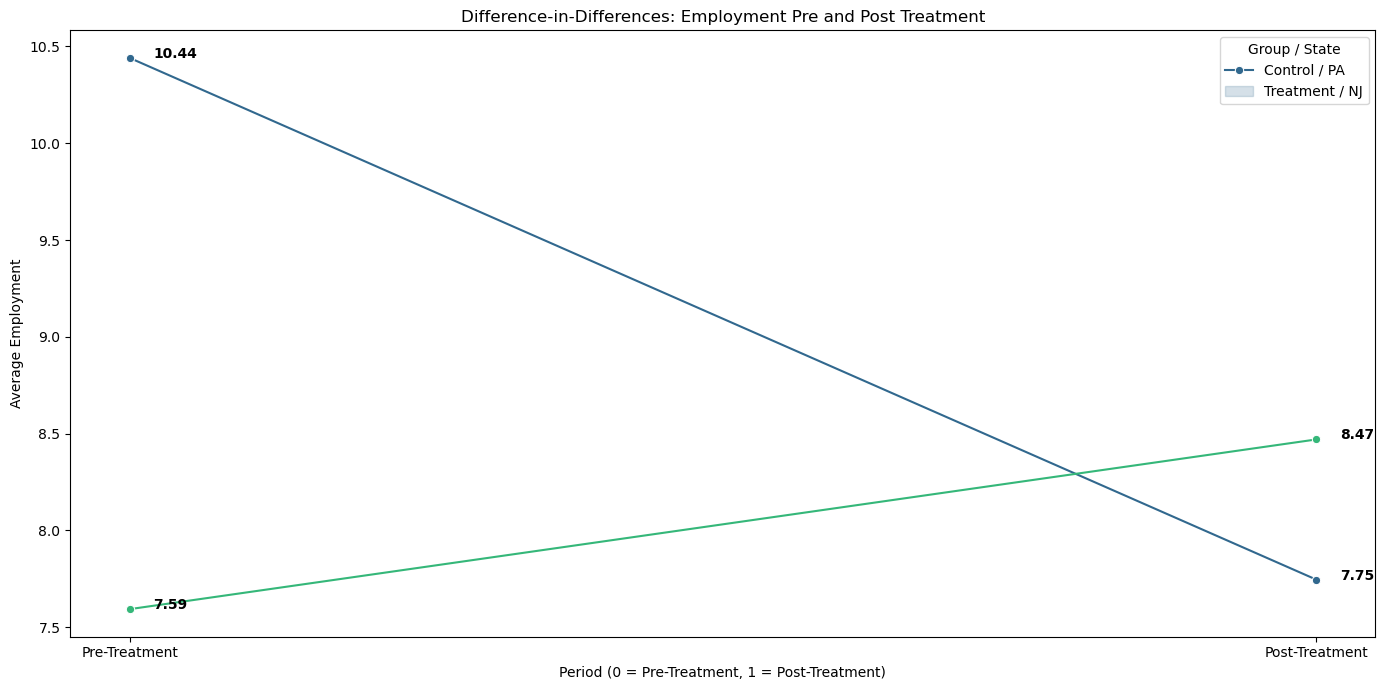

In [43]:
# First, calculate mean employment by group and time
mean_empl = dd_df.groupby(['Treatment', 'Post'])['Empl'].mean().reset_index()

# Now, plot these averages with lines to show the change from pre to post for each group
plt.figure(figsize=(14, 7))
sns.lineplot(x='Post', y='Empl', hue='Treatment', data=mean_empl, marker='o', palette='viridis')

plt.title('Difference-in-Differences: Employment Pre and Post Treatment')
plt.xlabel('Period (0 = Pre-Treatment, 1 = Post-Treatment)')
plt.ylabel('Average Employment')
plt.xticks(ticks=[0, 1], labels=['Pre-Treatment', 'Post-Treatment'])
plt.legend(title='Group / State', labels=['Control / PA', 'Treatment / NJ'])

# Adding annotations for clarity
for line in range(mean_empl.shape[0]):
    plt.text(mean_empl.Post[line]+0.02, mean_empl.Empl[line], 
             f"{mean_empl.Empl[line]:.2f}", horizontalalignment='left', 
             size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show();

**Question 4.1:** Now, let's make sure we can visually interpret our findings. Match the regression output numbers below to the appropriate regression equation.

**Equations:**

a) $const$

b) $const + \text{Treatment}$

c) $const + \text{Post}$

d) $const + \text{Post} + \text{Treatment} + \text{Treatment*Post}$

**Regression Output Numbers:**

1. $10.44$
2. $7.59$
3. $7.75$
4. $8.49$


In [44]:
a = 10.44
c = 7.75
d = 8.49
b = 7.59

In [45]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2:** Using the numbers from the visualization above, calculate the difference in difference estimate. It should match your estimate from question 3.5.

In [46]:
DD_estimate = (8.47 -b ) - (c -a )
DD_estimate

3.5700000000000003

In [47]:
grader.check("q4_2")

q4_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.3:** Looking back to your response to question 1.1 and the plot from above, what is a central piece of evidence we're lacking from dataset that would strengthen the validity of our diff-in-diff analysis?

I think the hours.opening variable strenghtened the validity of the diff-in-diff analysis because that also is directly correlated with employment. In the variable explanation, it said that longer hours of business might mean there is a need for more employees, so this may have been the variable that changed the predicitve value of this model. 

<!-- END QUESTION -->

### Conclusion
Congratulations, you have finished lab 7! We hope you enjoyed the lab - you're one step closer in becoming a master replicator of economics papers...

Have a great week(end)!

Peter.


---
## Feedback

**Question 5:** Please fill out this short [feedback form](https://forms.gle/58k2xRHNn6FSyAJ1A) to let us know your thoughts about this lab! We really appreciate your opinions and feedback! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword` below. 

In [48]:
codeword = 'Card'

In [49]:
grader.check("q5")

q5 results: All test cases passed!

---
## Sources

*FOUNDATIONS OF PROGRAM EVALUATION III REGRESSION TOOLS FOR CAUSAL ANALYSIS* by Data Science for 
Public Service (https://ds4ps.org/PROG-EVAL-III/index.html), retrieved 22 Feb 2024.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [50]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q2_1 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_6 results: All test cases passed!

    q3_2 results: All test cases passed!

    q3_3 results: All test cases passed!

    q3_4_1 results: All test cases passed!

    q3_5 results: All test cases passed!

    q3_7 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!

    q5 results: All test cases passed!
